# Random Forest Model with Blur Augmentations
## With and Without Histogram of Gradients

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import shiny_data


Xmat_train, Xmat_val, Xmat_test, y_train_enc, y_val_enc, y_test_enc = shiny_data.load_split_images()

# I assume we have dropped 'unknown'?
# Did we augment then resize?
# Are we blurring train and test? I thought we were told only to augment training data?
# Report - what part am I doing again? Cell split?
# What resolution(s) are we using again?

Tumour images loaded
Immune images loaded
Stromal images loaded
Other images loaded


### Non-HOG Baseline Model

In [ ]:
results = []

# Baseline
print("=== Baseline (no blur) ===")
X_train_flat = Xmat_train.reshape(Xmat_train.shape[0], -1)
X_test_flat = Xmat_test.reshape(Xmat_test.shape[0], -1)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_flat, y_train_enc)
y_pred = model.predict(X_test_flat)

acc = accuracy_score(y_test_enc, y_pred)
f1 = f1_score(y_test_enc, y_pred, average='weighted')
prec = precision_score(y_test_enc, y_pred, average='weighted')
rec = recall_score(y_test_enc, y_pred, average='weighted')
cm = confusion_matrix(y_test_enc, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)

results = []
results.append({
    "blur_radius": 0,
    "accuracy": acc,
    "f1": f1,
    "precision": prec,
    "recall": rec,
    "confusion_matrix": cm
})

### Non-HOG Blur Model

In [3]:
# Blur - no further pixels?
for radius in [1, 3, 5, 7, 10]:
    print(f"=== Blur radius {radius} ===")
    
    X_blur_train = shiny_data.apply_blur(Xmat_train, radius)
    X_blur_test = shiny_data.apply_blur(Xmat_test, radius)

    X_train_flat = X_blur_train.reshape(X_blur_train.shape[0], -1)
    X_test_flat = X_blur_test.reshape(X_blur_test.shape[0], -1)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_flat, y_train_enc)
    y_pred = model.predict(X_test_flat)

    acc = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average='weighted')
    prec = precision_score(y_test_enc, y_pred, average='weighted')
    rec = recall_score(y_test_enc, y_pred, average='weighted')
    cm = confusion_matrix(y_test_enc, y_pred)

    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Precision:", prec)
    print("Recall:", rec)
    print("Confusion Matrix:\n", cm)

    results.append({
        "blur_radius": radius,
        "accuracy": acc,
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "confusion_matrix": cm
    })

=== Blur radius 1 ===
Accuracy: 0.2425
F1 Score: 0.24179944596890526
=== Blur radius 3 ===
Accuracy: 0.253
F1 Score: 0.2524616068144123
=== Blur radius 5 ===
Accuracy: 0.2505
F1 Score: 0.2502332942045677
=== Blur radius 7 ===
Accuracy: 0.251
F1 Score: 0.2503847956151717
=== Blur radius 10 ===
Accuracy: 0.2305
F1 Score: 0.23017881113795213


### Non-HOG Baseline and Blur - Results

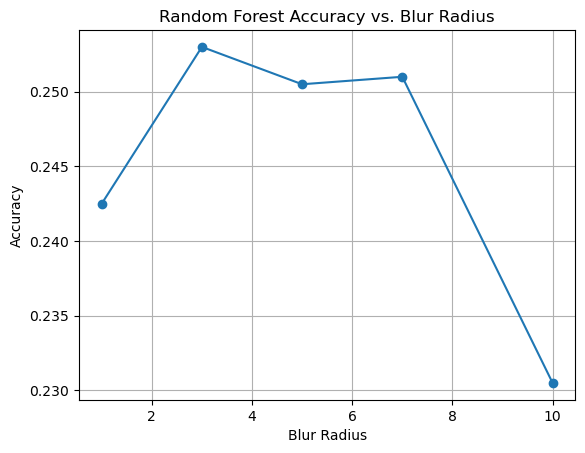

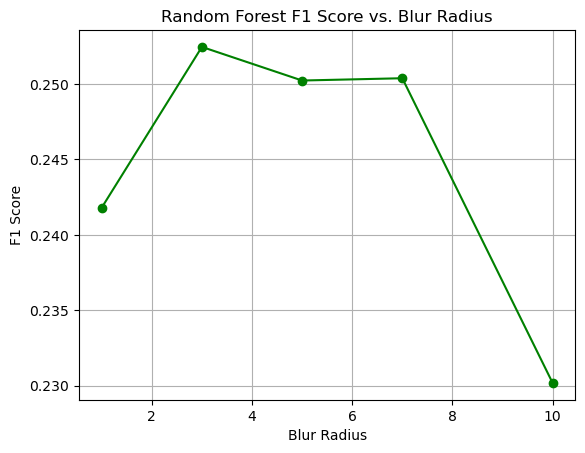

In [5]:
# Convert to numpy arrays for plotting
blur_radii = [r["blur_radius"] for r in results]
accuracies = [r["accuracy"] for r in results]
precisions = [r["precision"] for r in results]
recalls = [r["recall"] for r in results]
f1_scores = [r["f1"] for r in results]

# Accuracy plot
plt.figure()
plt.plot(blur_radii, accuracies, marker='o')
plt.xlabel("Blur Radius")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Blur Radius")
plt.grid(True)
plt.show()

# Precision plot
plt.figure()
plt.plot(blur_radii, precisions, marker='o', color='purple')
plt.xlabel("Blur Radius")
plt.ylabel("Precision")
plt.title("Random Forest Precision vs. Blur Radius")
plt.grid(True)
plt.show()

# Recall plot
plt.figure()
plt.plot(blur_radii, recalls, marker='o', color='orange')
plt.xlabel("Blur Radius")
plt.ylabel("Recall")
plt.title("Random Forest Recall vs. Blur Radius")
plt.grid(True)
plt.show()

# F1 plot
plt.figure()
plt.plot(blur_radii, f1_scores, marker='o', color='green')
plt.xlabel("Blur Radius")
plt.ylabel("F1 Score")
plt.title("Random Forest F1 Score vs. Blur Radius")
plt.grid(True)
plt.show()

### Computing Histogram of Gradient (HOG) Features 

In [14]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Convert to grayscale if it's RGB
        if img.shape[-1] == 3:
            img = np.mean(img, axis=-1)
        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(features)
    return np.array(hog_features)

### HOG Baseline Model

In [26]:
hog_results = []

# Baseline
print("=== Baseline (no blur, HOG) ===")
X_train_hog = extract_hog_features(Xmat_train)
X_test_hog = extract_hog_features(Xmat_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_hog, y_train_enc)
y_pred = model.predict(X_test_hog)

acc = accuracy_score(y_test_enc, y_pred)
f1 = f1_score(y_test_enc, y_pred, average='weighted')
prec = precision_score(y_test_enc, y_pred, average='weighted')
rec = recall_score(y_test_enc, y_pred, average='weighted')
cm = confusion_matrix(y_test_enc, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)

hog_results.append({
    "blur_radius": 0,
    "accuracy": acc,
    "f1": f1,
    "precision": prec,
    "recall": rec,
    "confusion_matrix": cm
})

=== Baseline (no blur, HOG) ===
Accuracy: 0.26125
F1 Score: 0.2606401700809283
Precision: 0.2614509963277002
Recall: 0.26125
Confusion Matrix:
 [[293 266 252 189]
 [264 254 251 231]
 [268 263 278 191]
 [271 269 240 220]]


### HOG with Blur Model

In [29]:
for radius in [1, 3, 5, 7, 10]:
    print(f"=== HOG with blur radius {radius} ===")
    
    X_blur_train = shiny_data.apply_blur(Xmat_train, radius)
    X_blur_test = shiny_data.apply_blur(Xmat_test, radius)

    X_train_hog = extract_hog_features(X_blur_train)
    X_test_hog = extract_hog_features(X_blur_test)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_hog, y_train_enc)
    y_pred = model.predict(X_test_hog)

    acc = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average='weighted')
    prec = precision_score(y_test_enc, y_pred, average='weighted')
    rec = recall_score(y_test_enc, y_pred, average='weighted')
    cm = confusion_matrix(y_test_enc, y_pred)
    
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Precision:", prec)
    print("Recall:", rec)
    print("Confusion Matrix:\n", cm)

    hog_results.append({
        "blur_radius": radius,
        "accuracy": acc,
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "confusion_matrix": cm
    })

=== HOG with blur radius 1 ===
Accuracy: 0.259
F1 Score: 0.2586604865710743
Precision: 0.25893771253130055
Recall: 0.259
Confusion Matrix:
 [[299 253 225 223]
 [272 251 253 224]
 [259 271 249 221]
 [248 274 241 237]]
=== HOG with blur radius 3 ===
Accuracy: 0.25125
F1 Score: 0.2508896432087916
Precision: 0.2509460273080022
Recall: 0.25125
Confusion Matrix:
 [[280 250 234 236]
 [275 258 236 231]
 [247 282 246 225]
 [247 265 267 221]]
=== HOG with blur radius 5 ===
Accuracy: 0.2475
F1 Score: 0.2473309123943711
Precision: 0.2481350149211951
Recall: 0.2475
Confusion Matrix:
 [[256 264 268 212]
 [273 262 245 220]
 [279 267 249 205]
 [275 263 239 223]]
=== HOG with blur radius 7 ===
Accuracy: 0.24075
F1 Score: 0.24068343708551884
Precision: 0.24075351237024453
Recall: 0.24075
Confusion Matrix:
 [[247 256 254 243]
 [259 252 254 235]
 [237 284 235 244]
 [257 254 260 229]]
=== HOG with blur radius 10 ===
Accuracy: 0.2525
F1 Score: 0.25213861906386004
Precision: 0.252266305768071
Recall: 0.2525


### HOG Baseline and Blur - Results

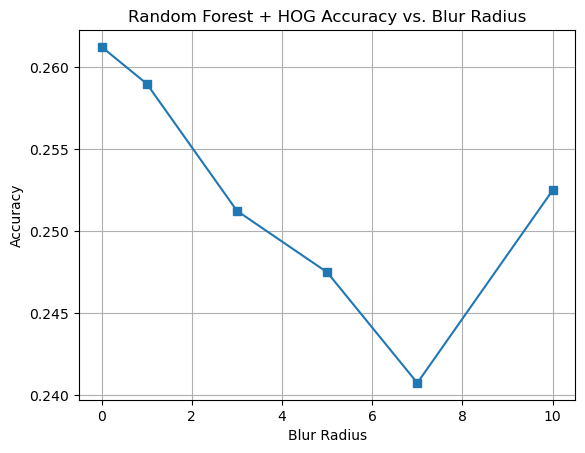

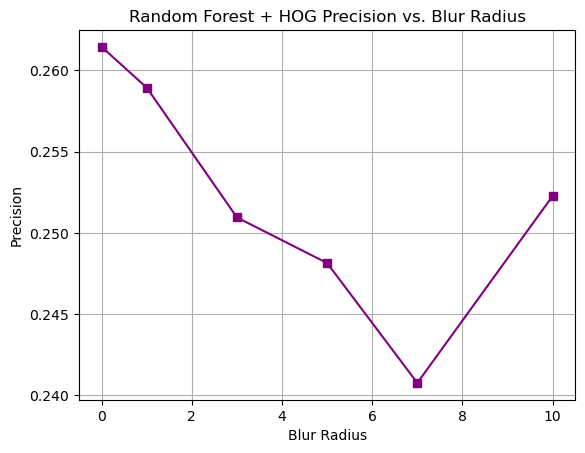

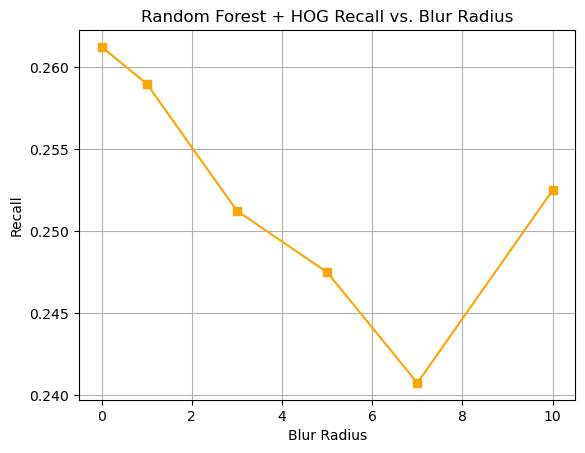

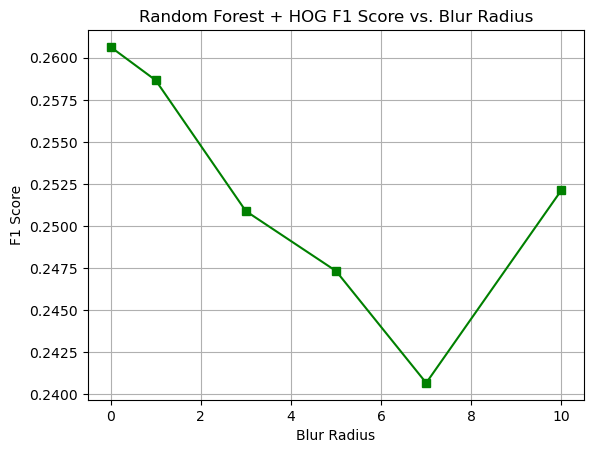

In [32]:
# Extract from hog_results
hog_blur_radii = [r["blur_radius"] for r in hog_results]
hog_accuracies = [r["accuracy"] for r in hog_results]
hog_precisions = [r["precision"] for r in hog_results]
hog_recalls = [r["recall"] for r in hog_results]
hog_f1_scores = [r["f1"] for r in hog_results]

# Accuracy plot (HOG)
plt.figure()
plt.plot(hog_blur_radii, hog_accuracies, marker='s', label='HOG Accuracy')
plt.xlabel("Blur Radius")
plt.ylabel("Accuracy")
plt.title("Random Forest + HOG Accuracy vs. Blur Radius")
plt.grid(True)
plt.show()

# Precision plot (HOG)
plt.figure()
plt.plot(hog_blur_radii, hog_precisions, marker='s', color='purple', label='HOG Precision')
plt.xlabel("Blur Radius")
plt.ylabel("Precision")
plt.title("Random Forest + HOG Precision vs. Blur Radius")
plt.grid(True)
plt.show()

# Recall plot (HOG)
plt.figure()
plt.plot(hog_blur_radii, hog_recalls, marker='s', color='orange', label='HOG Recall')
plt.xlabel("Blur Radius")
plt.ylabel("Recall")
plt.title("Random Forest + HOG Recall vs. Blur Radius")
plt.grid(True)
plt.show()

# F1 plot (HOG)
plt.figure()
plt.plot(hog_blur_radii, hog_f1_scores, marker='s', color='green', label='HOG F1')
plt.xlabel("Blur Radius")
plt.ylabel("F1 Score")
plt.title("Random Forest + HOG F1 Score vs. Blur Radius")
plt.grid(True)
plt.show()